## Предисловие

In [177]:
N = 5
FS = 100 * N
FP = 5 * N # pulse frequency / number of samples per pulse
WINDOW_SIZE = int((FS / FP) / 4)
NOISE_SCALE = 0.1


In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

#### Задание 1

In [179]:
def pulse(t: np.array, magnitude: float = 1, noise_scale: float = NOISE_SCALE) -> np.array:
    rng = np.random.default_rng()
    noise = rng.normal(0, NOISE_SCALE, t.shape)
    return signal.square(2 * np.pi * (FS / FP) * t) + noise

In [180]:
# stolen from
# https://stackoverflow.com/a/43200476
def moving_average_filter(samples: np.array, window_size: int, window: callable = signal.boxcar) -> np.array:
    w = window(window_size)
    w /= np.sum(w)
    return np.convolve(samples, w, "same")

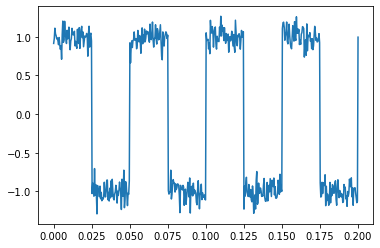

In [181]:
t = np.linspace(0, 0.2, FS)
p = pulse(t)
plt.plot(t, p)

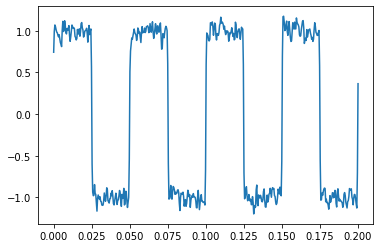

In [182]:
f =  moving_average_filter(p, 5, signal.blackman)
plt.plot(t, f)

#### Задание 2

Проанализировать зависимость отфильтрованного сигнала от размера окна.

In [78]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

plt.rcParams['animation.ffmpeg_path'] = "ffmpeg.exe"

t = np.linspace(0, 0.2, FS)
p = pulse(t)

fig, ax = plt.subplots(dpi=200)
line = ax.plot(t, moving_average_filter(p, 1), label=" ")
l = ax.legend(title="Factor", loc="upper right")

def frame(q: int):
    f = moving_average_filter(p, q)
    line[0].set_data(t, f)
    l.get_texts()[0].set_text(q)
    return line

anim = FuncAnimation(fig, frame, range(1, 100), interval=300)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

<IPython.core.display.Javascript object>

#### Задание 3

Построить временные графики и графики спектров для следующих типов окон: прямоугольных, треугольных, Хэмминга и Блэкмена

In [210]:
def draw_plot(window: callable):
    n = 1000
    t = np.linspace(0, 1, n)
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=200)
    fig.suptitle(str(window.__name__))
    w = window(n)
    ax[0].plot(t, w)
    ax[0].set_title("Signal")

    x = np.fft.fftfreq(n)
    y = np.abs(np.fft.fft(w))
    x, y = zip(*sorted(zip(x, y)))
    ax[1].set_yscale("log")
    ax[1].set_ylim(1e-4, 1e2)
    ax[1].plot(x, y)
    ax[1].set_title("Spectrum")

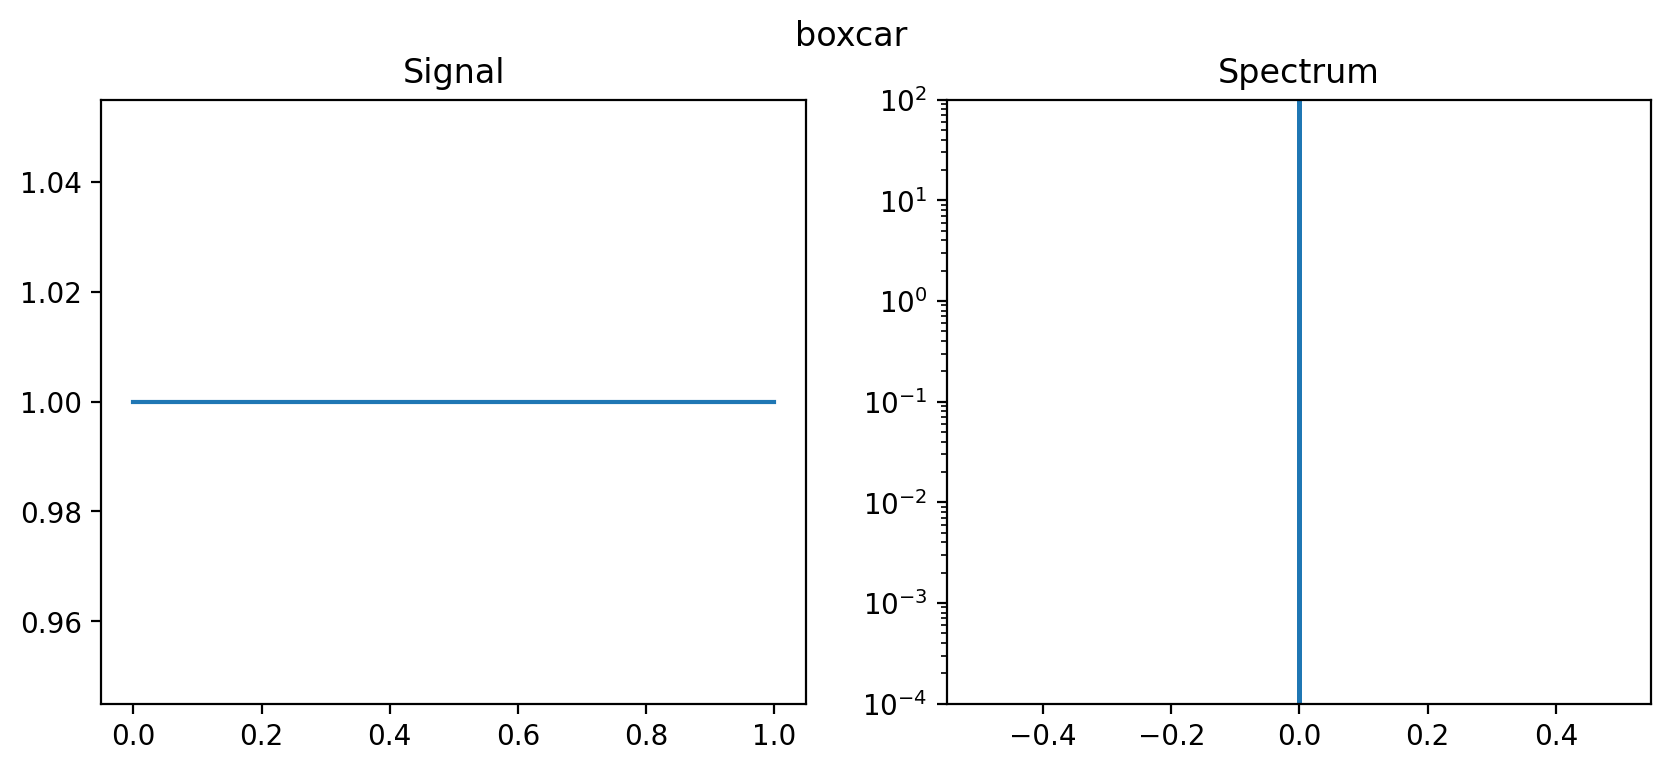

In [211]:
draw_plot(signal.boxcar)

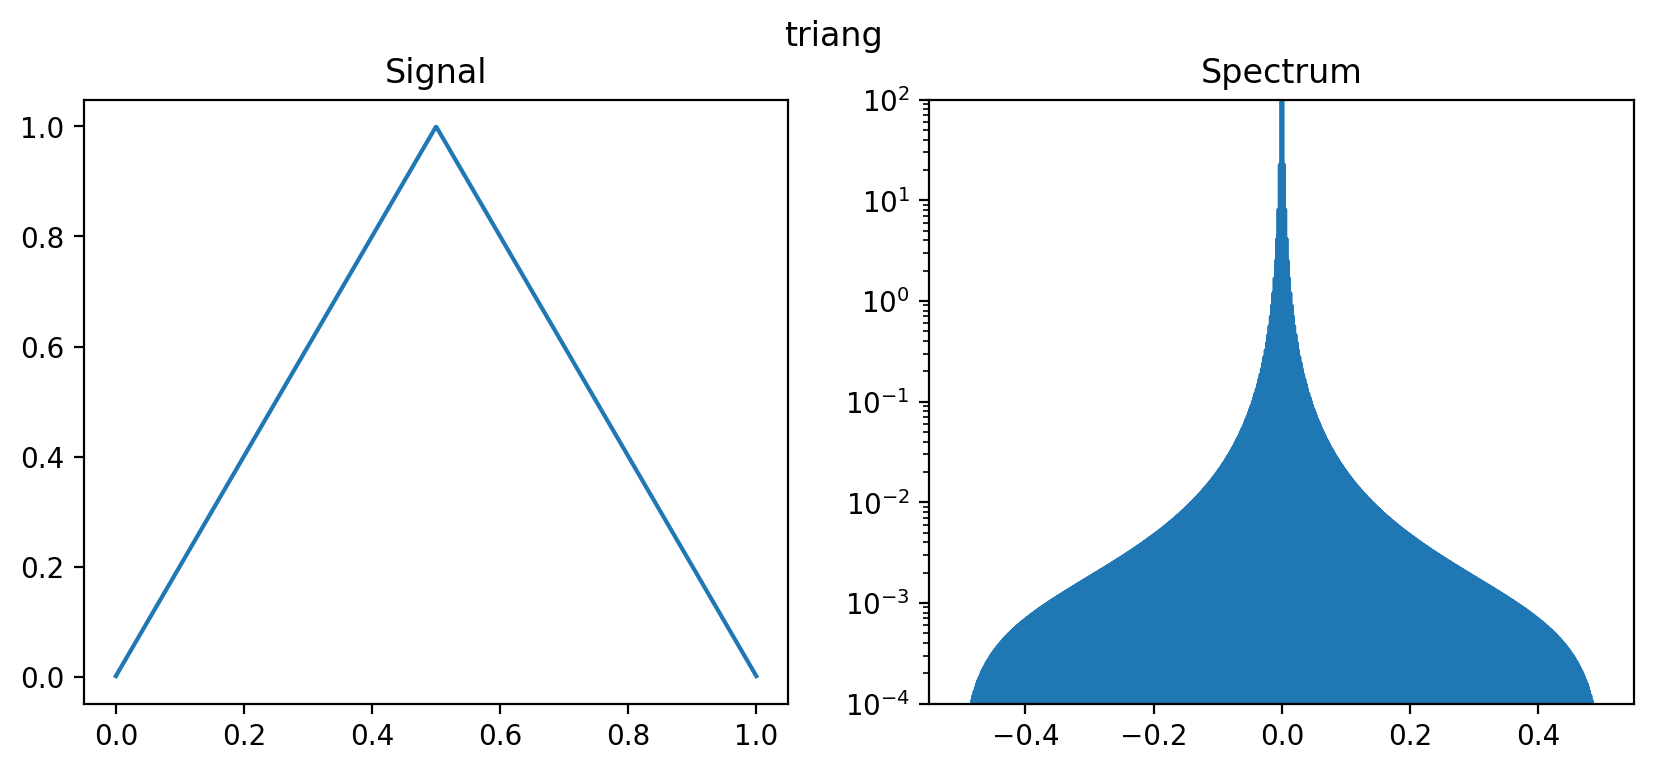

In [212]:
draw_plot(signal.triang)

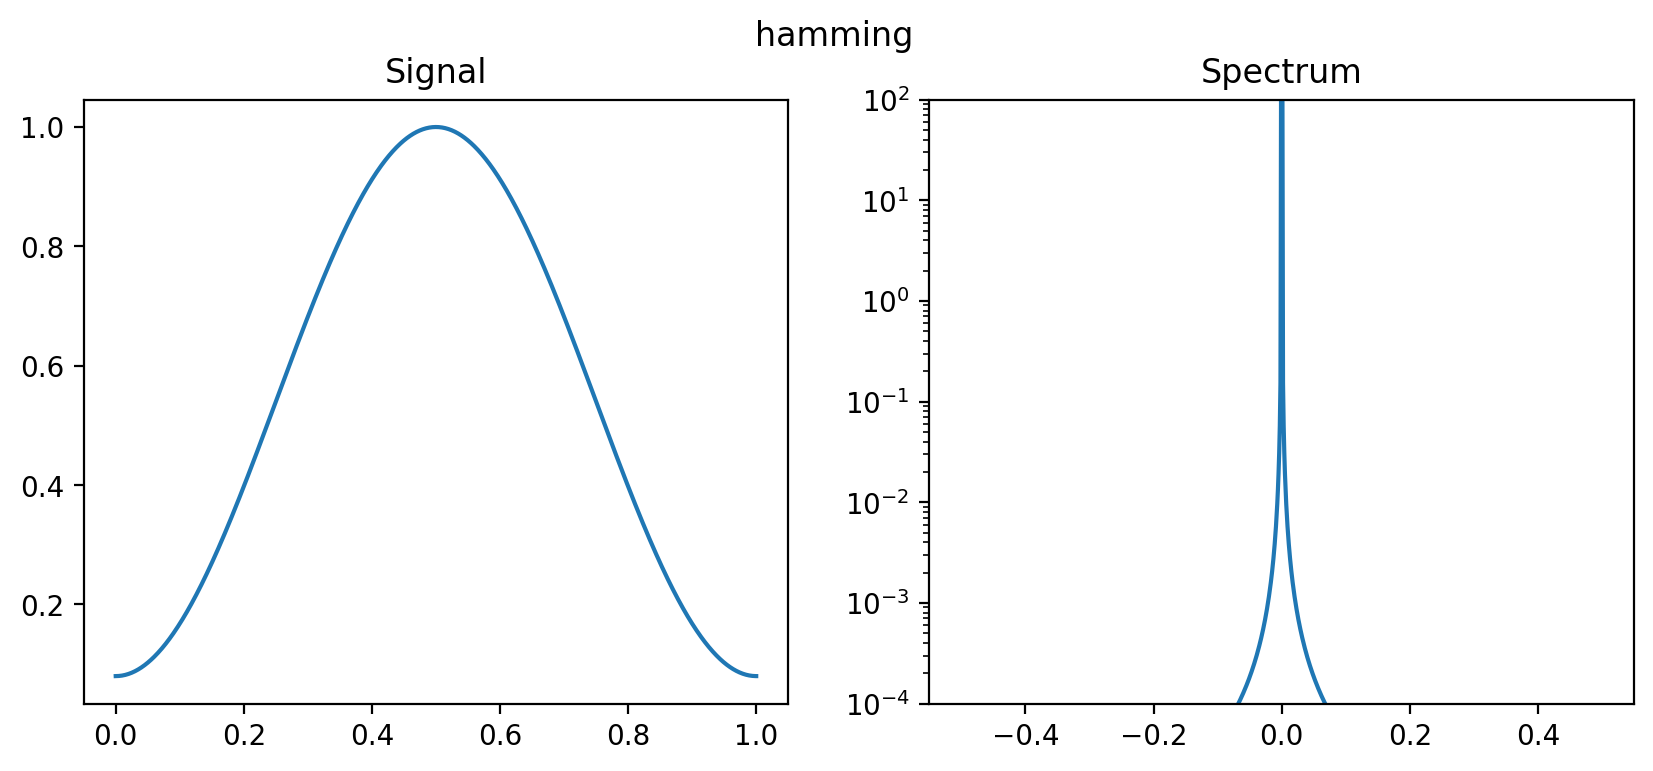

In [215]:
draw_plot(signal.hamming)

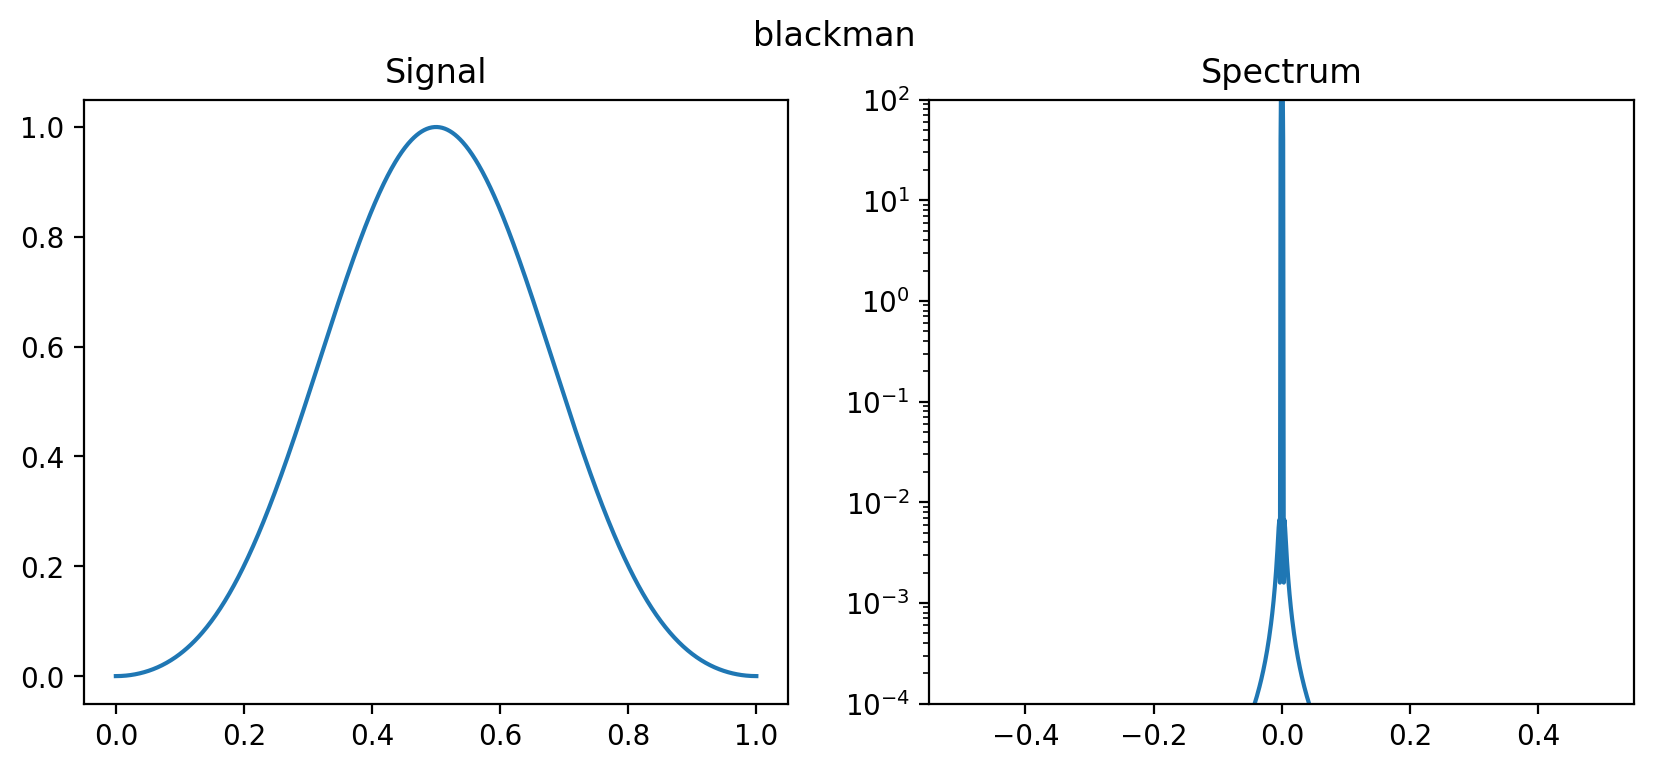

In [216]:
draw_plot(signal.blackman)

#### Задание 4 & 5

Используя оконные функции из пункта выше, промоделировать КИХ-фильтры и применить к сигналу выше

In [171]:
t = np.linspace(0, 0.2, FS)
p = pulse(t)

def draw_plot(window: callable):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=200)
    fig.suptitle(str(window.__name__))
    f = moving_average_filter(p, 5, window)
    ax[0].plot(t, f)
    ax[0].set_title("Signal")

    x = np.fft.fftfreq(len(f))
    y = np.abs(np.fft.fft(f))
    x, y = zip(*sorted(zip(x, y)))
    ax[1].plot(x, y)
    ax[1].set_title("Spectrum")


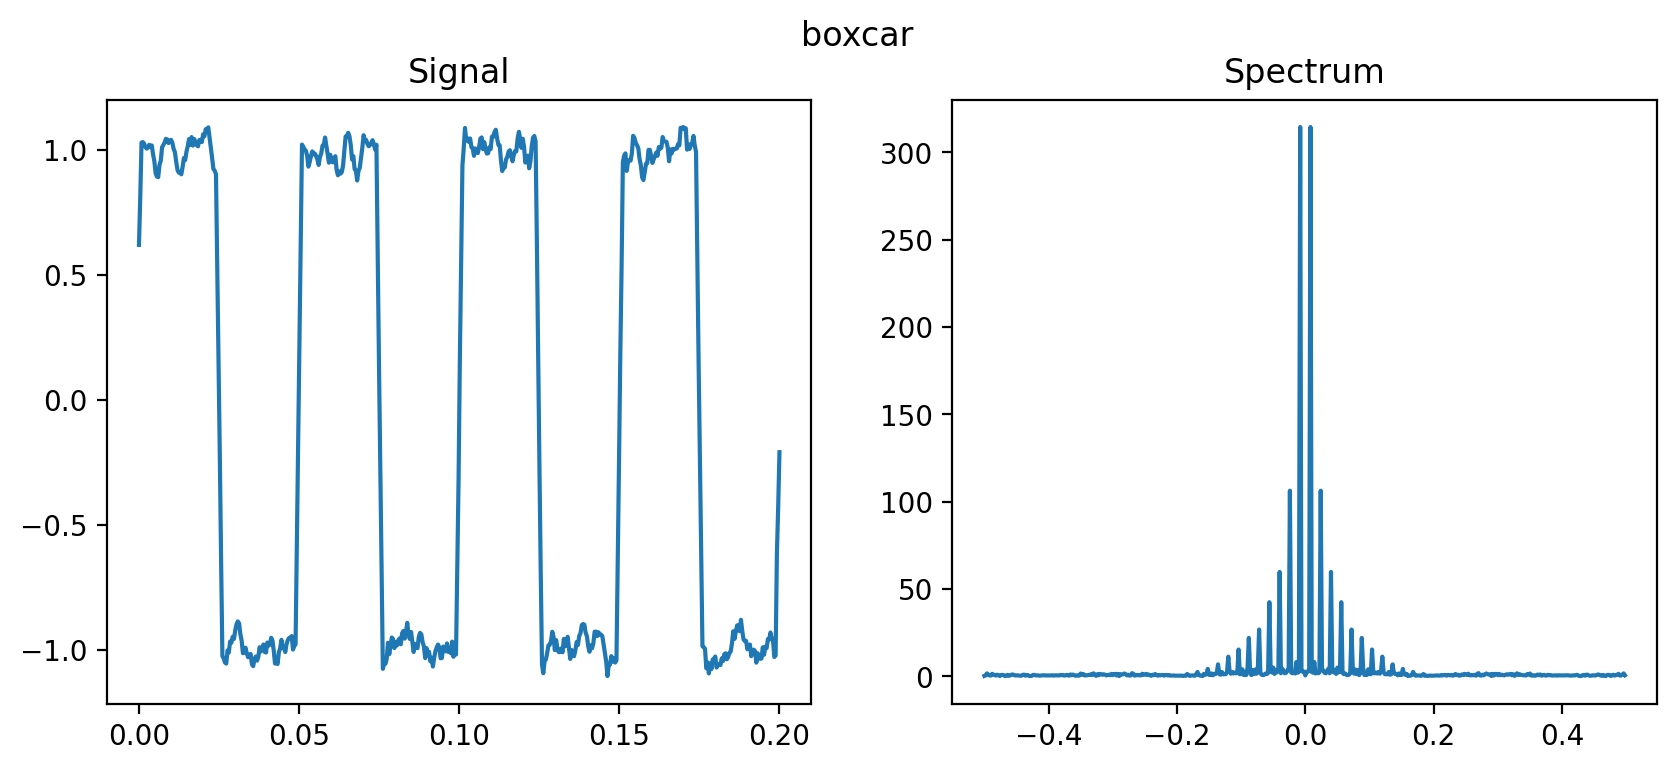

In [173]:
draw_plot(signal.boxcar)

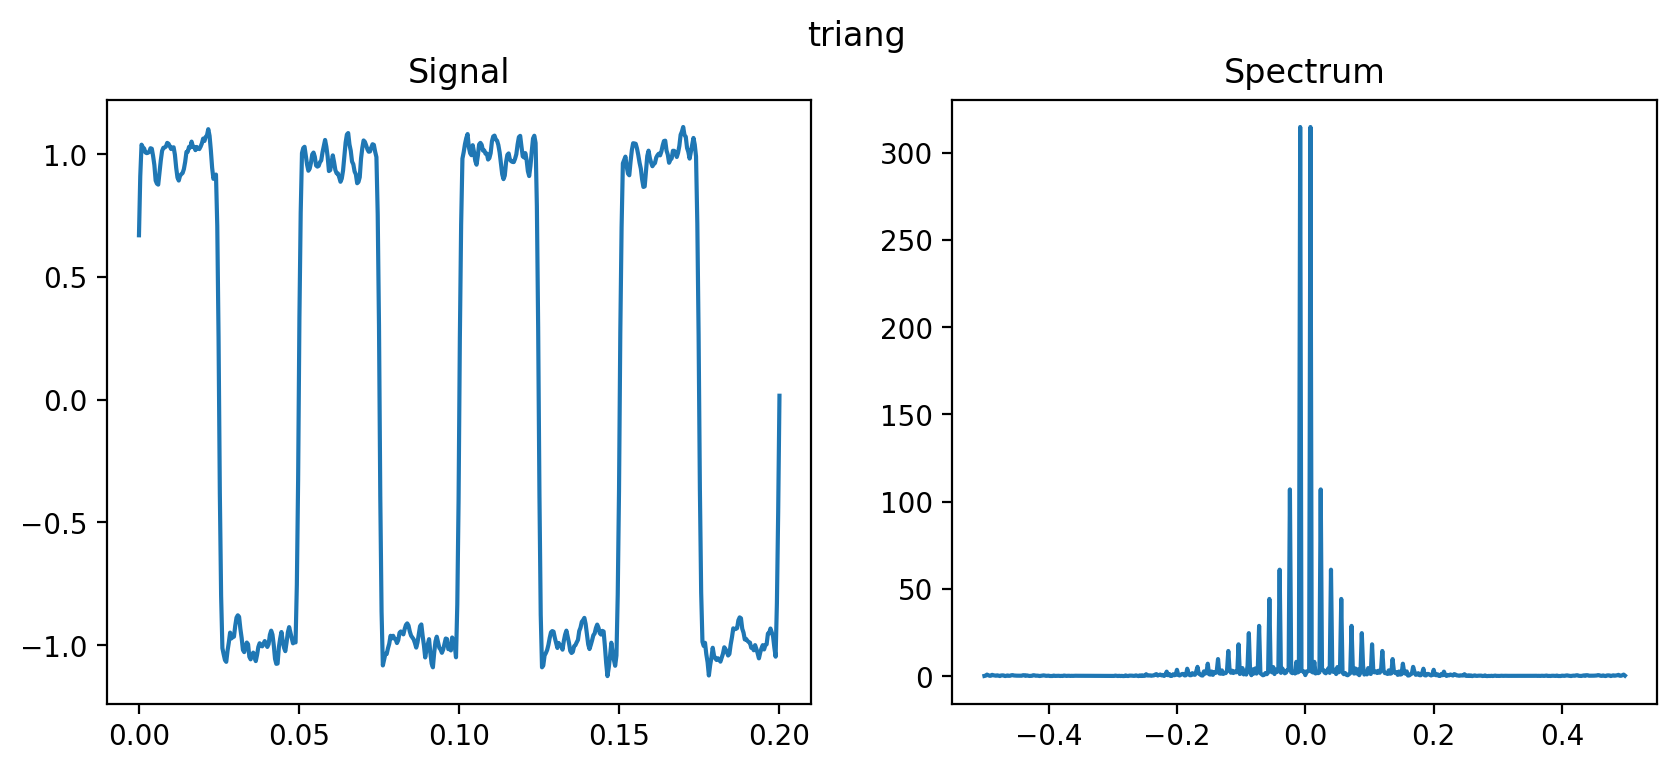

In [174]:
draw_plot(signal.triang)

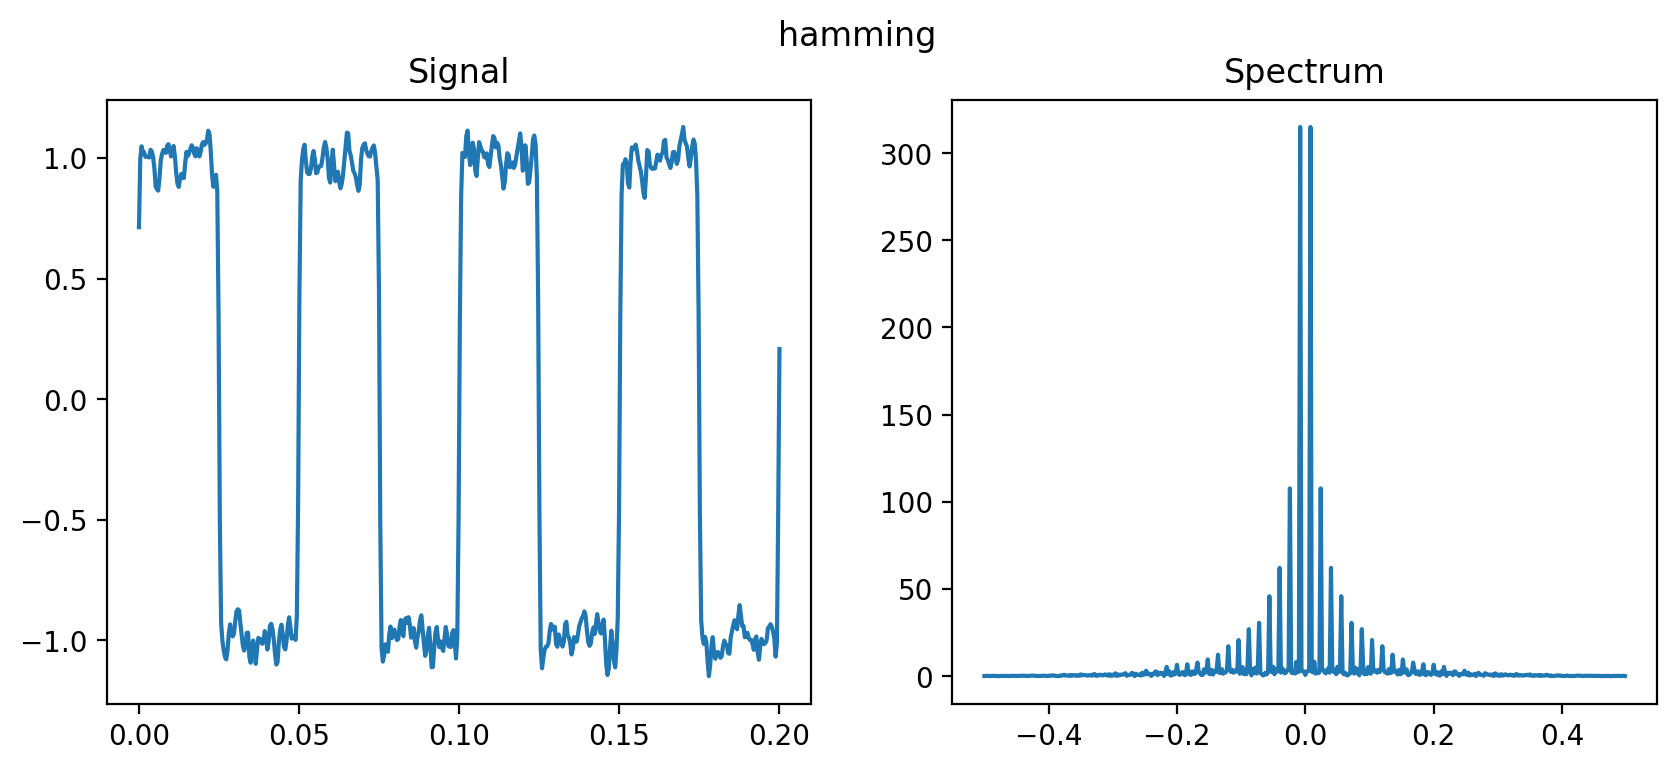

In [175]:
draw_plot(signal.hamming)

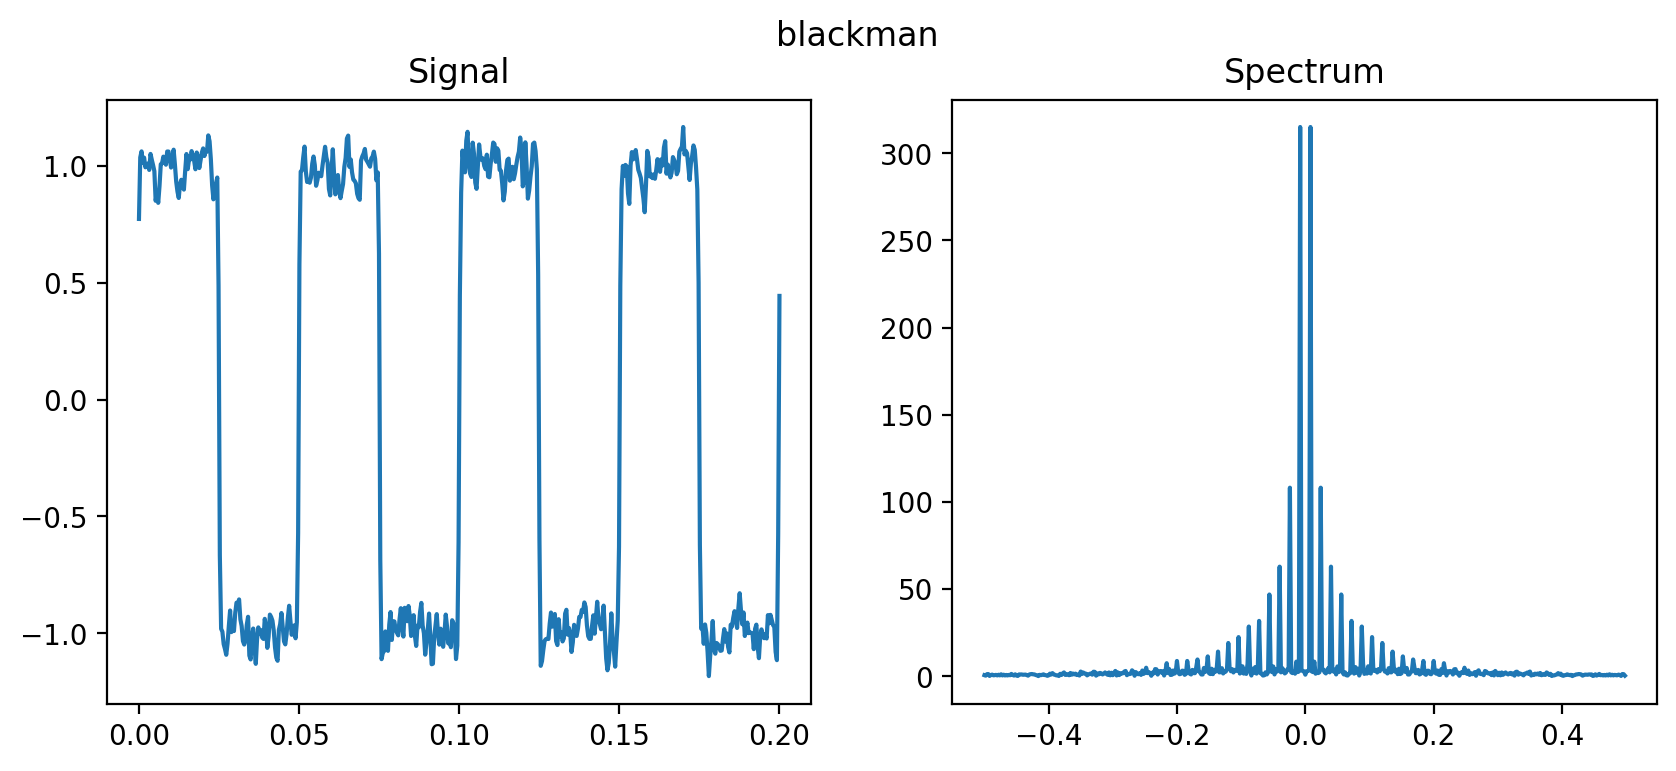

In [176]:
draw_plot(signal.blackman)